In [1]:
cd ..

/Users/yanndubois/Desktop/GitHub/alpaca_eval


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from alpaca_eval import utils, metrics, annotators, constants, analyze, plotting, main

with utils.silent():
    analyzer = analyze.Analyzer()

/Users/yanndubois/opt/anaconda3/envs/alpaca_eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
analyzer.df_gold_crossannotations

,instruction,output_1,output_2,preference,annotator_index,dataset,datasplit,time_per_example,price_per_example,index,n_annotated
0,"The sentence you are given might be too wordy,...",If you have questions about my rate or need to...,If you have any questions about my rate or nee...,1,15,selfinstruct,eval,36.8,0.3,0,4
1,"The sentence you are given might be too wordy,...",If you have questions about my rate or need to...,If you have any questions about my rate or nee...,1,0,selfinstruct,eval,36.8,0.3,1,4
2,"The sentence you are given might be too wordy,...",If you have questions about my rate or need to...,If you have any questions about my rate or nee...,1,9,selfinstruct,eval,36.8,0.3,2,4
3,"The sentence you are given might be too wordy,...",If you have questions about my rate or need to...,If you have any questions about my rate or nee...,2,7,selfinstruct,eval,36.8,0.3,3,4
4,"Analyze the word choice, phrasing, punctuation...",The writer of this email likely sounds Appreci...,"The tone of the email is mostly informal, with...",1,10,selfinstruct,eval,36.8,0.3,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2587,Write a captivating movie review for a recentl...,"The recently released science fiction film, ""T...","Recently released science fiction film ""The Di...",1,1,vicuna,eval,36.8,0.3,3,4
2588,"Write a symphony concert review, discussing th...",The symphony concert last night was truly a ma...,The symphony concert began with a stirring per...,2,8,vicuna,eval,36.8,0.3,0,4
2589,"Write a symphony concert review, discussing th...",The symphony concert last night was truly a ma...,The symphony concert began with a stirring per...,2,1,vicuna,eval,36.8,0.3,1,4
2590,"Write a symphony concert review, discussing th...",The symphony concert last night was truly a ma...,The symphony concert began with a stirring per...,2,0,vicuna,eval,36.8,0.3,2,4


In [59]:
analyzer.df_gold_annotations

,instruction,output_1,output_2,preference,annotator_index,dataset,datasplit,generator,sample_mode,time_per_example,price_per_example
0,Choose Spotify playlists that match the given ...,Here are some playlists from Spotify to get yo...,Here are three Spotify playlists that match th...,2,7,selfinstruct,eval,AlpacaFarm SFT 10K,"temp=0.7,top_p=1.0,max_new_tokens=300,seed=0",36.8,0.3
1,Please suggest a few papers to consider based ...,"1. ""A Scaling Law for Machine Learning Algorit...","1. ""On the Powerlaw Distribution in Machine Le...",1,7,selfinstruct,eval,AlpacaFarm SFT 10K,"temp=0.7,top_p=1.0,max_new_tokens=300,seed=0",36.8,0.3
2,"Desk jobs require writing a lot of emails, so ...","Regards, Respectfully, Cordially, Best Wishes,...","Dearly, Affectionately, Truly, Cordially, Resp...",1,1,selfinstruct,eval,AlpacaFarm SFT 10K,"temp=0.7,top_p=1.0,max_new_tokens=300,seed=0",36.8,0.3
3,Describe the responsibilities of the given job...,The responsibilities of a Security Officer inc...,A Security Officer is responsible for maintain...,2,5,selfinstruct,eval,AlpacaFarm SFT 10K,"temp=0.7,top_p=1.0,max_new_tokens=300,seed=0",36.8,0.3
4,You are given two questions. Check if they are...,The two questions are not duplicates. The firs...,Question1: This question is a duplicate of: Wh...,1,7,selfinstruct,eval,AlpacaFarm SFT 10K,"temp=0.7,top_p=1.0,max_new_tokens=300,seed=0",36.8,0.3
...,...,...,...,...,...,...,...,...,...,...,...
17696,What if the Internet had been invented during ...,The Renaissance period was a time of great adv...,The Renaissance period was a time of great adv...,0,17,vicuna,eval,Davinci003,"temp=0.7,top_p=1.0,max_new_tokens=300",36.8,0.3
17697,can you please create a python script that out...,"Yes, I can create a python script that outputs...","Yes, I can create a python script that outputs...",0,17,oasst,eval,Davinci003,"temp=0.7,top_p=1.0,max_new_tokens=300",36.8,0.3
17698,How can L’Hopital’s Rule be used in day to day...,L'Hopital's Rule can be used to solve indeterm...,L'Hopital's Rule can be used to solve indeterm...,0,17,oasst,eval,Davinci003,"temp=0.7,top_p=1.0,max_new_tokens=300",36.8,0.3
17699,"Hi, I have a question about MFCC (mel frequenc...","No, MFCC and MEL-spectograms are not the same....","No, MFCC and MEL-spectograms are not the same....",0,17,koala,eval,Davinci003,"temp=0.7,top_p=1.0,max_new_tokens=300",36.8,0.3


# Comparing annotators

First, let us compare the properties of different annotators

In [4]:
# precomputing leaderboard
for annotators_config in constants.MINIMAL_EVALUATORS:
    with utils.silent():
        _=main.analyze_evaluators(annotators_config=annotators_config, is_save_leaderboard=True, is_return_instead_of_print=True)

In [5]:
evaluator_leaderboard,_ = main.analyze_evaluators(annotators_config=None, 
                                                  is_return_instead_of_print=True)
evaluator_leaderboard = evaluator_leaderboard.loc[constants.MINIMAL_EVALUATORS,:]

## Time and price and quality

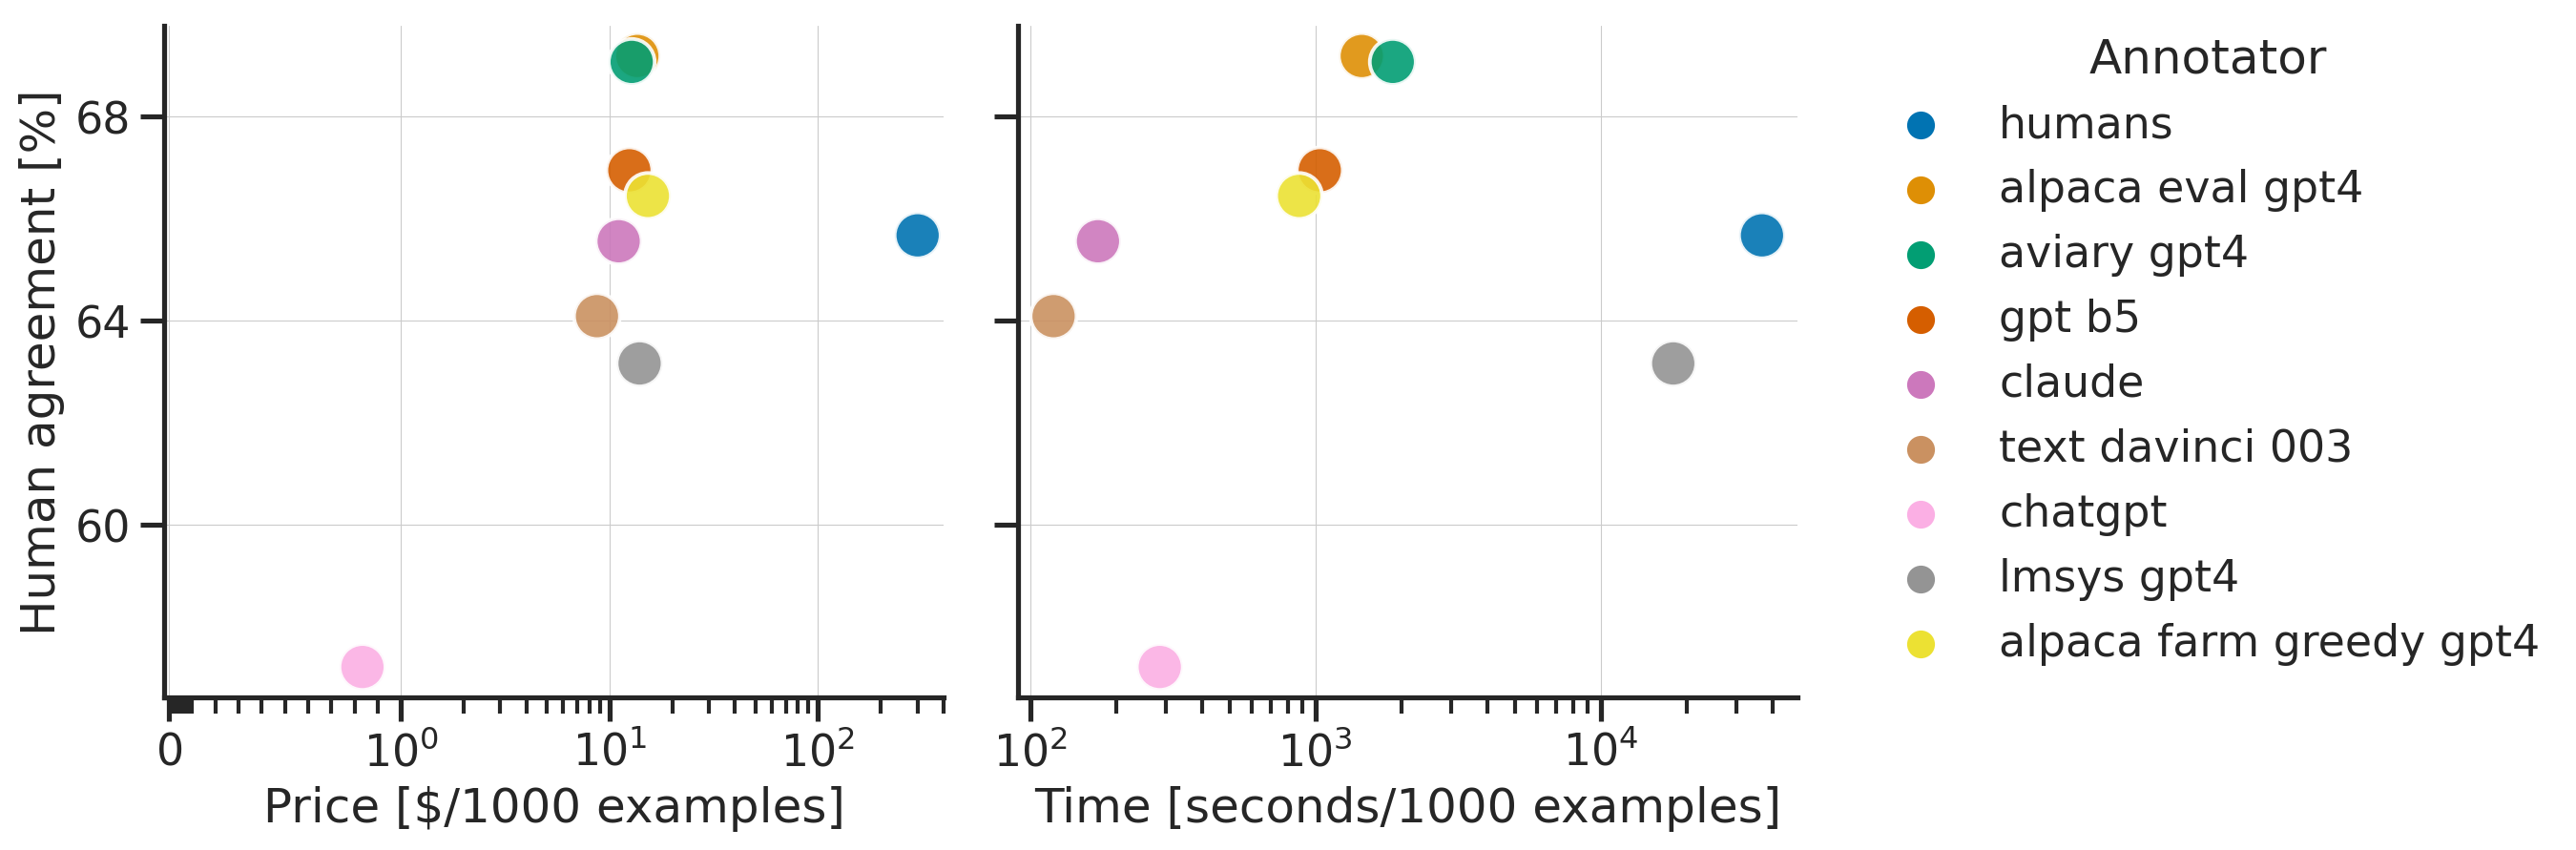

In [6]:
g=plotting.plot_quality_vs_price_and_time(evaluator_leaderboard)
plotting.save_fig(g, "figures/plot_quality_vs_price_and_time.png")

## Price and quality

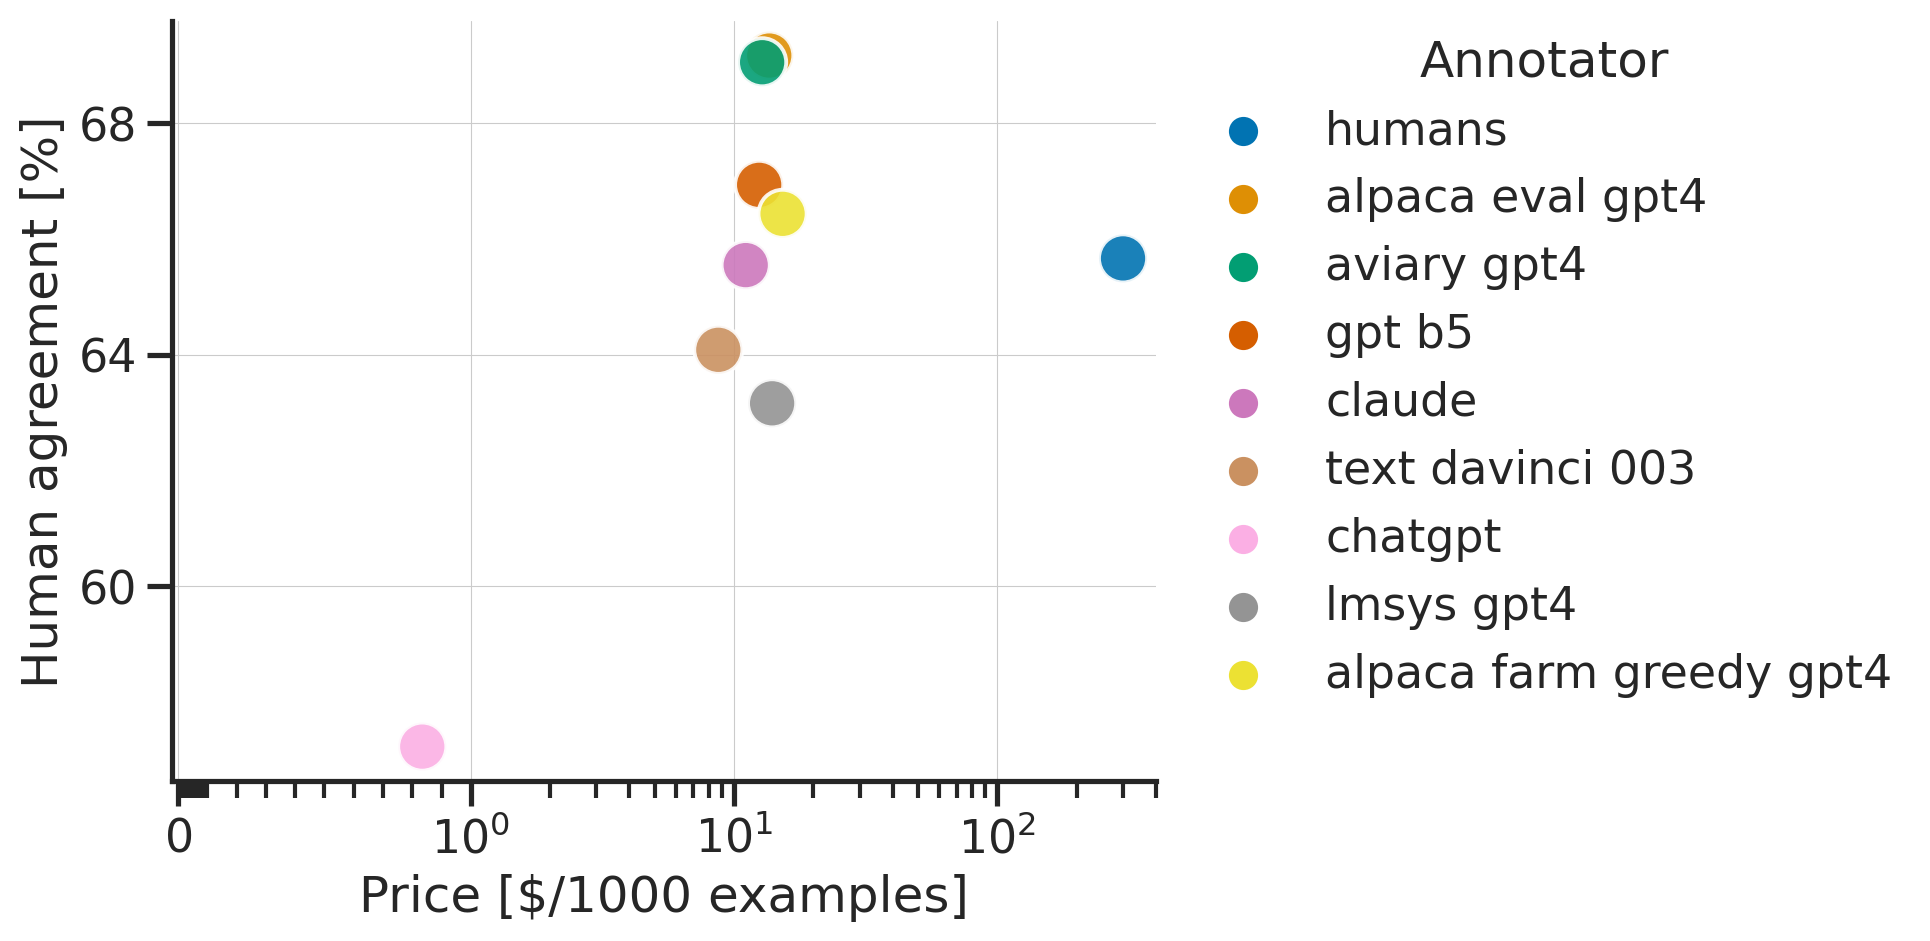

In [7]:
g=plotting.plot_quality_vs_price(evaluator_leaderboard)

## Time and quality

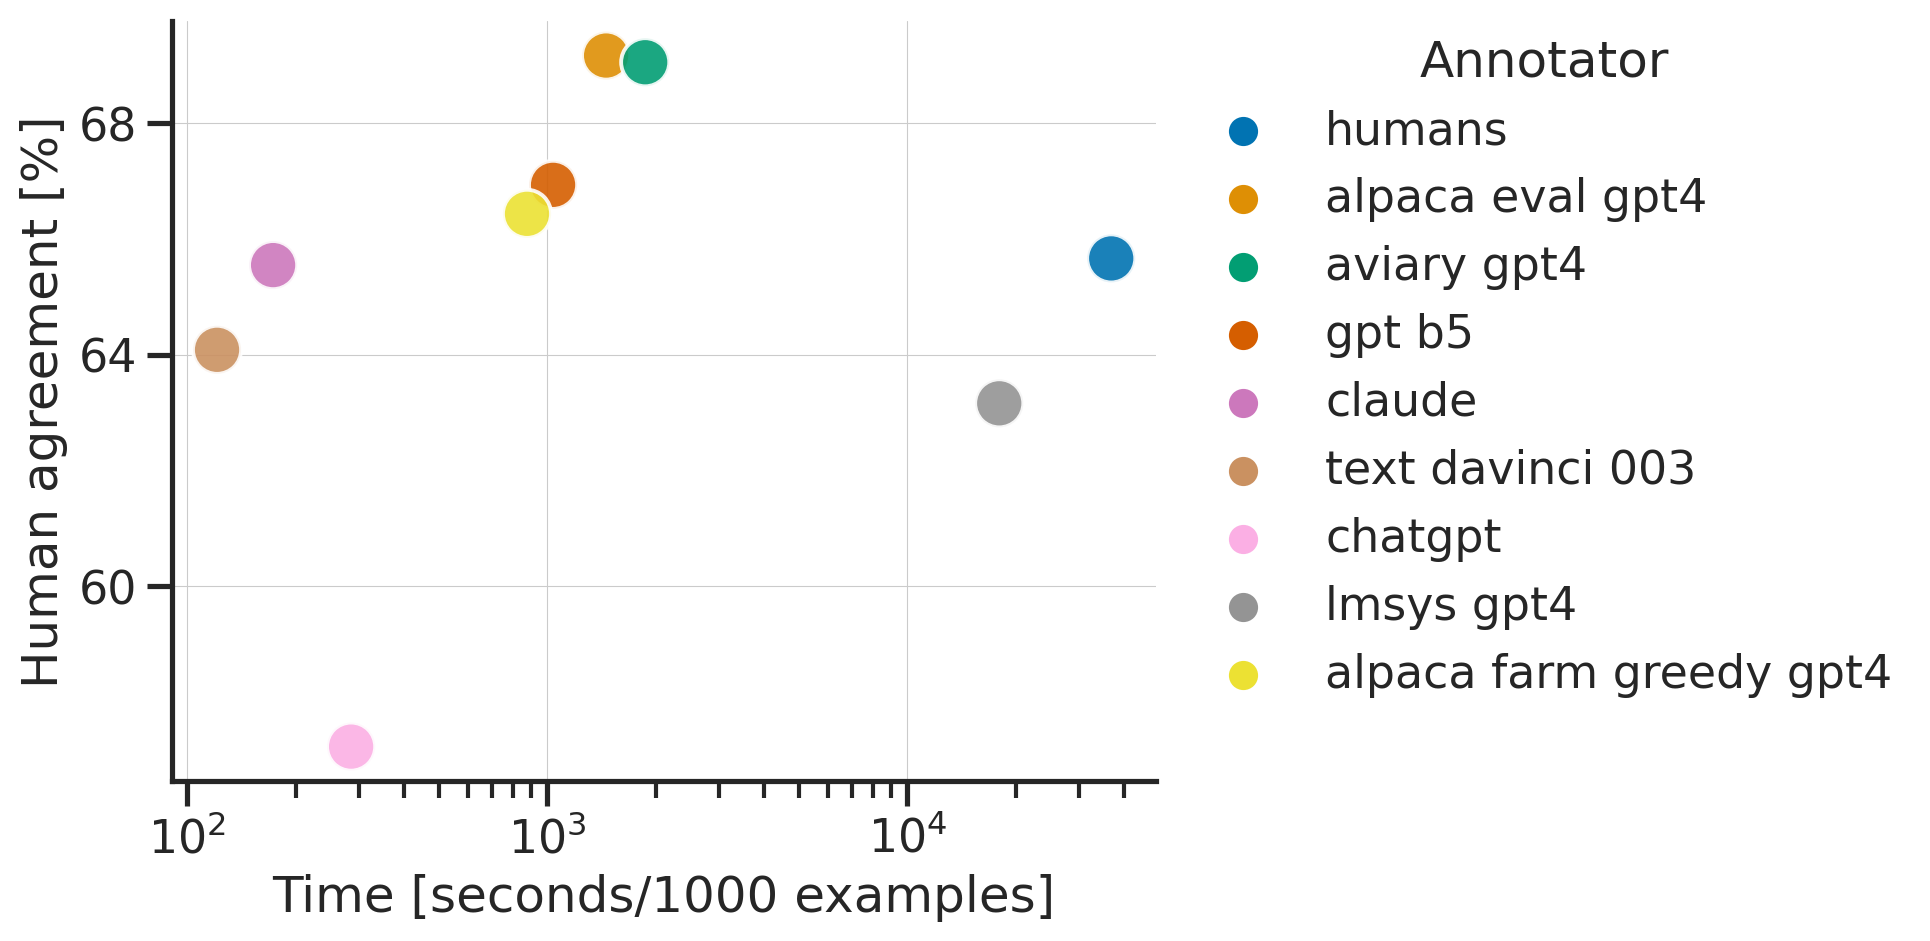

In [8]:
g=plotting.plot_quality_vs_time(evaluator_leaderboard)

## Bias vs variance

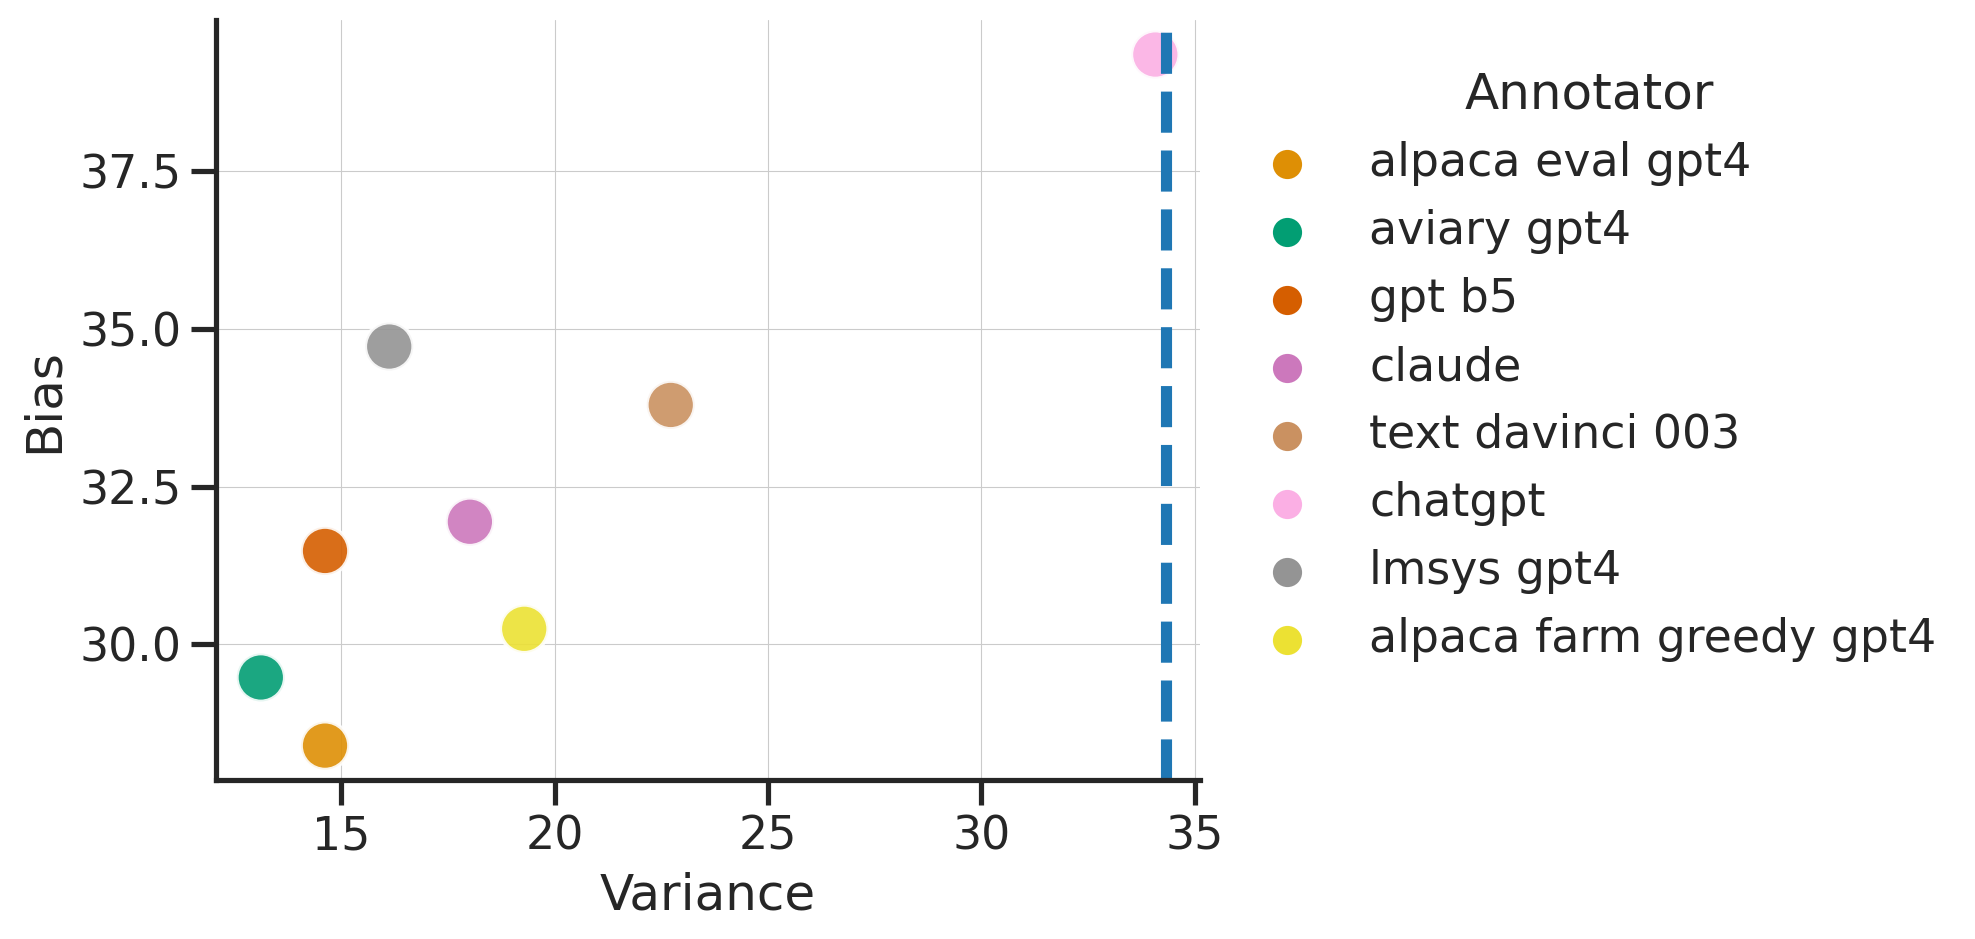

In [9]:
g=plotting.plot_bias_vs_variance(evaluator_leaderboard)

## All properties

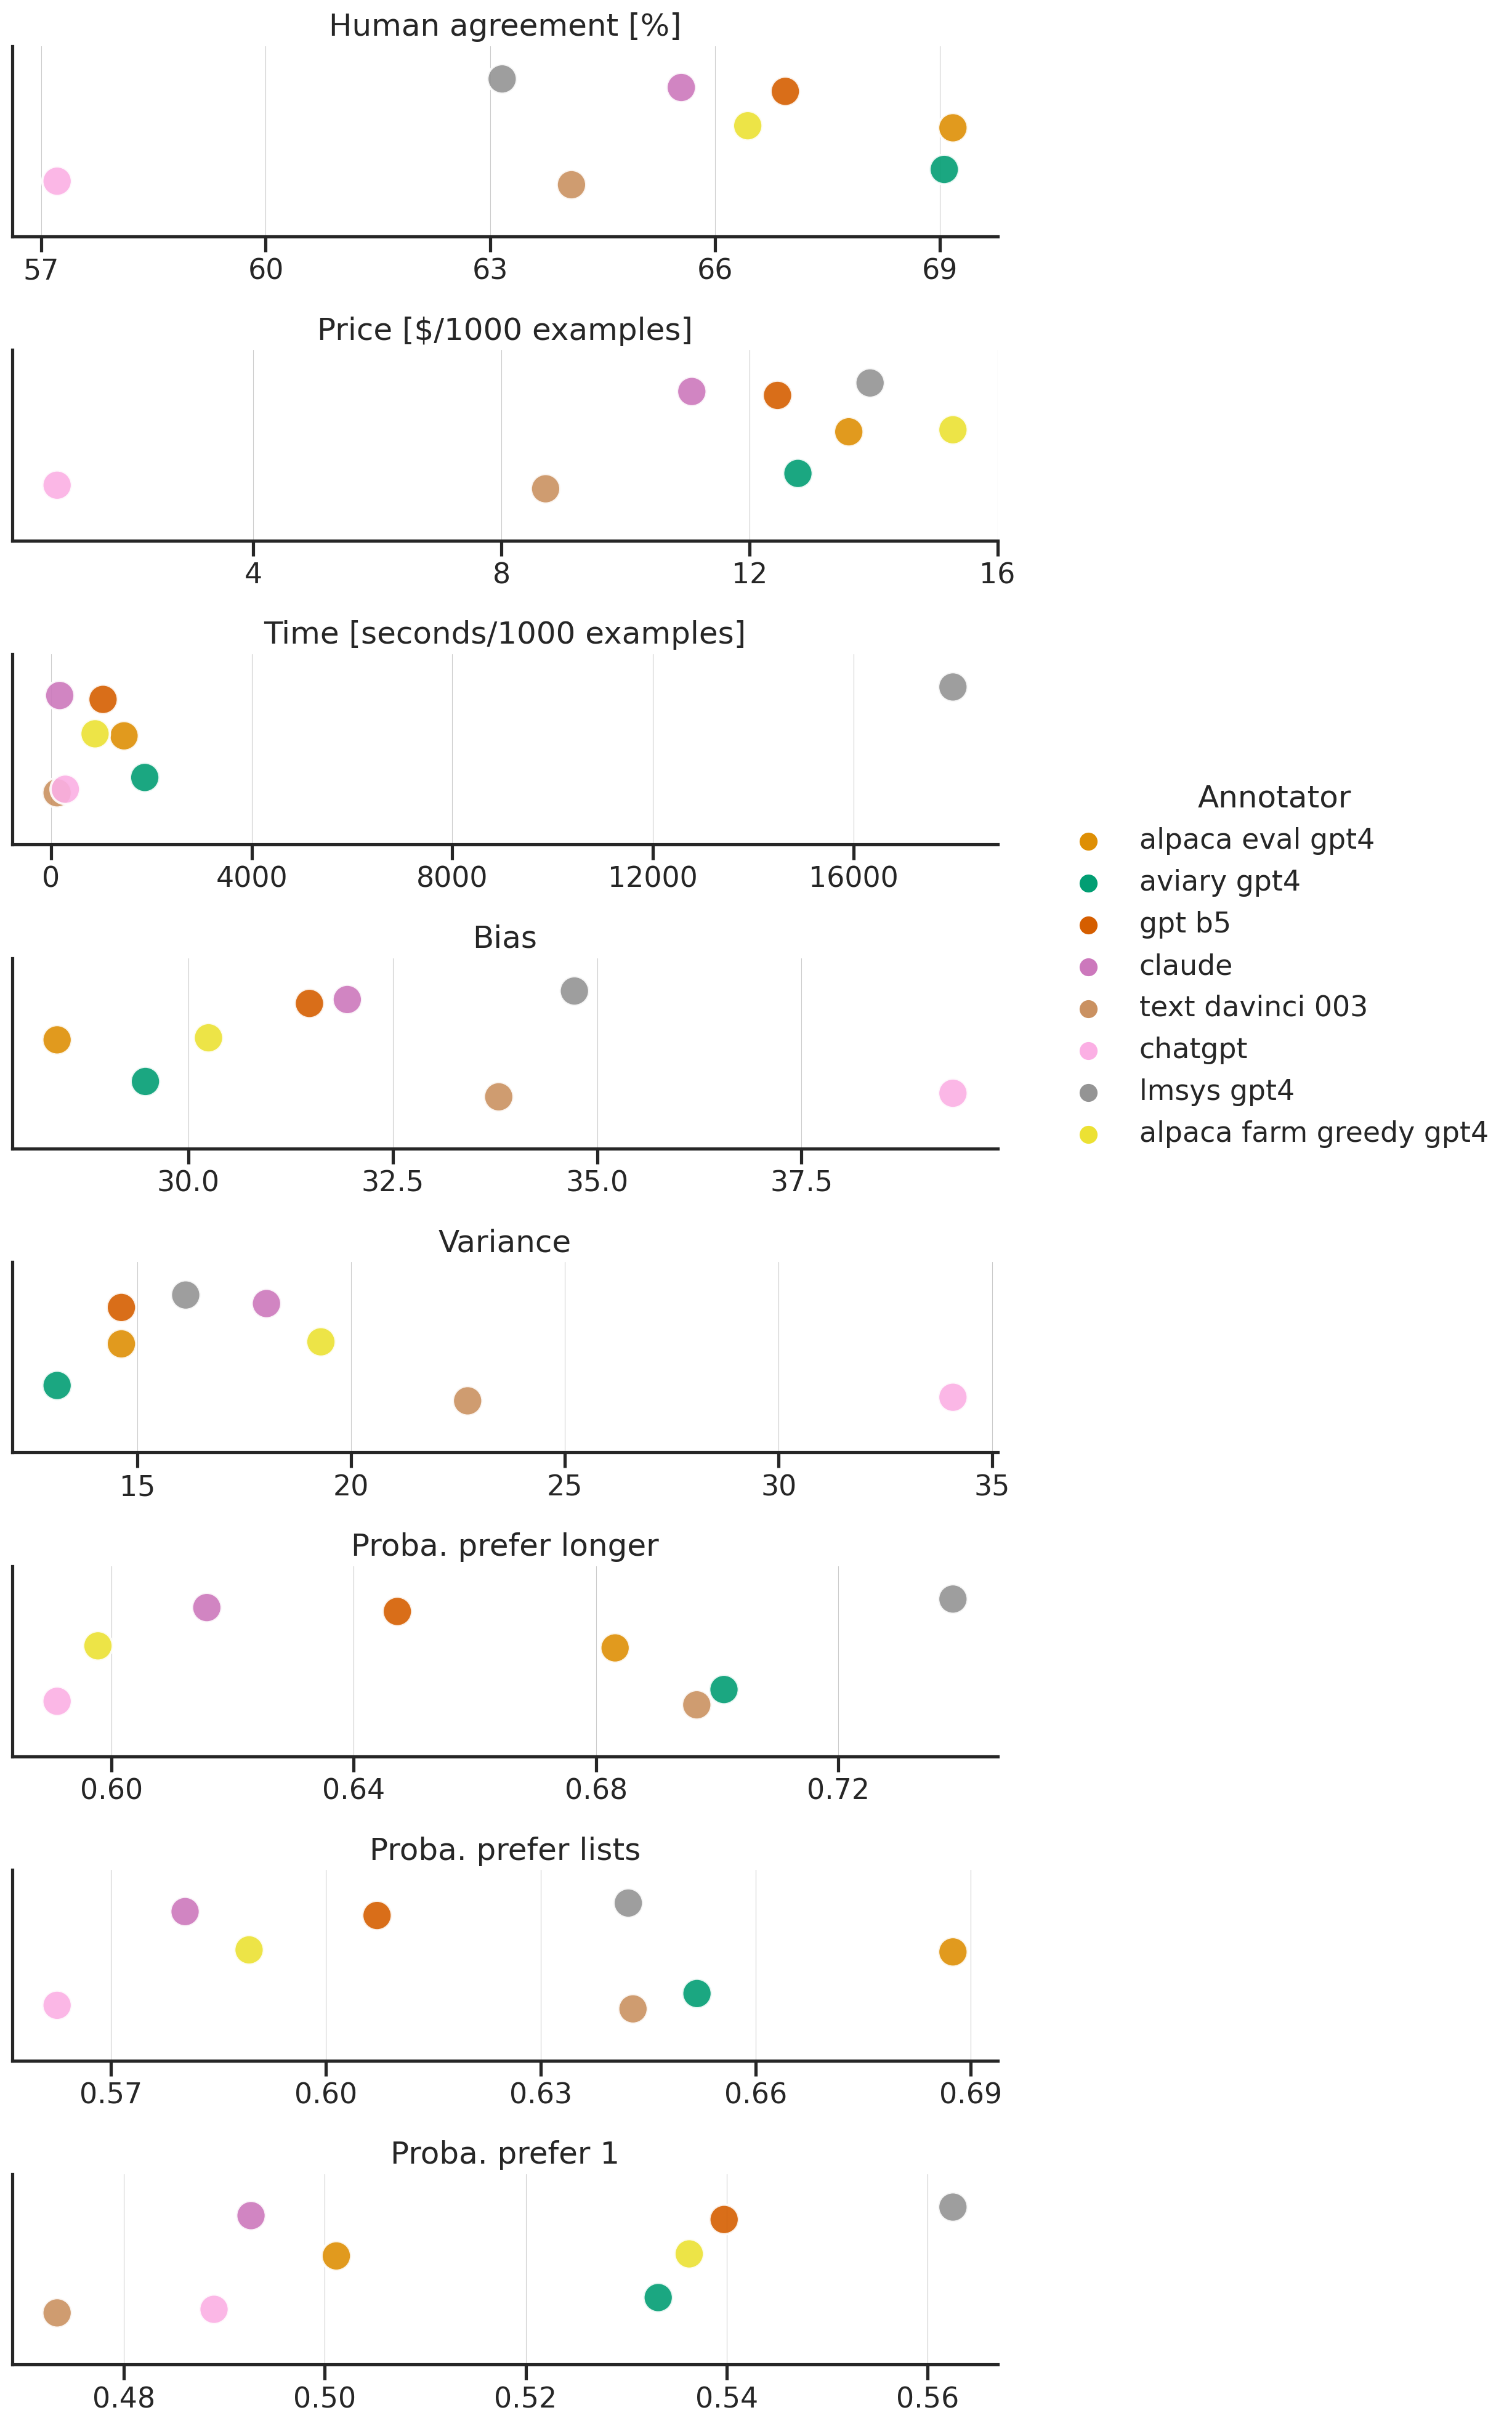

In [10]:
g=plotting.plot_all_properties(evaluator_leaderboard, 
                               is_human_at_top=True, 
                               annotators_to_rm=["humans"],
                              properties_to_rm=["# parsed","mode"])

# Analyzing an annotator

Once we decided on which automatic annotator to use, a natural question is whether making a leaderboard using our automatic annotator gives similar results as a leaderboard from humans. As part of AlpacaEval, we provide human annotations of outputs from 22 methods annotated on our eval set => 22*805 = ~18K annotations. As a result we can test the correlation of any automatic annotation with human annotations.

Annotation chunk: 100%|█████████████████████████████████████████████████████████████████████████| 139/139 [02:39<00:00,  1.15s/it]


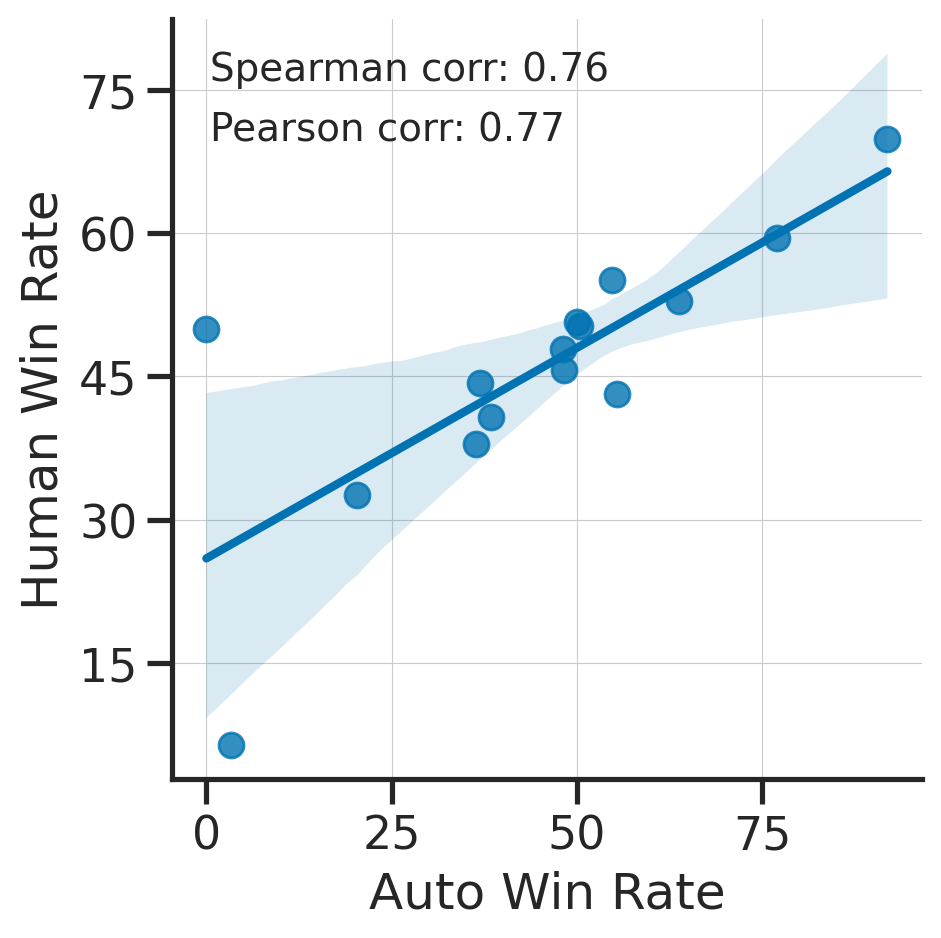

In [7]:
is_compute_annotations = True # very expensive (18K annotations)
if is_compute_annotations:
    df_annotations = analyze.get_annotations(analyzer, annotators.PairwiseAnnotator,  annotators_config="alpaca_eval_gpt4")

    auto_leaderboard = df_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
    auto_leaderboard = auto_leaderboard.sort_values(by="win_rate", ascending=False)

    human_leaderboard = analyzer.df_gold_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
    human_leaderboard = human_leaderboard.sort_values(by="win_rate", ascending=False)

    g = plotting.plot_winrate_correlations(human_leaderboard.loc[models_keep,:], auto_leaderboard.loc[models_keep,:])



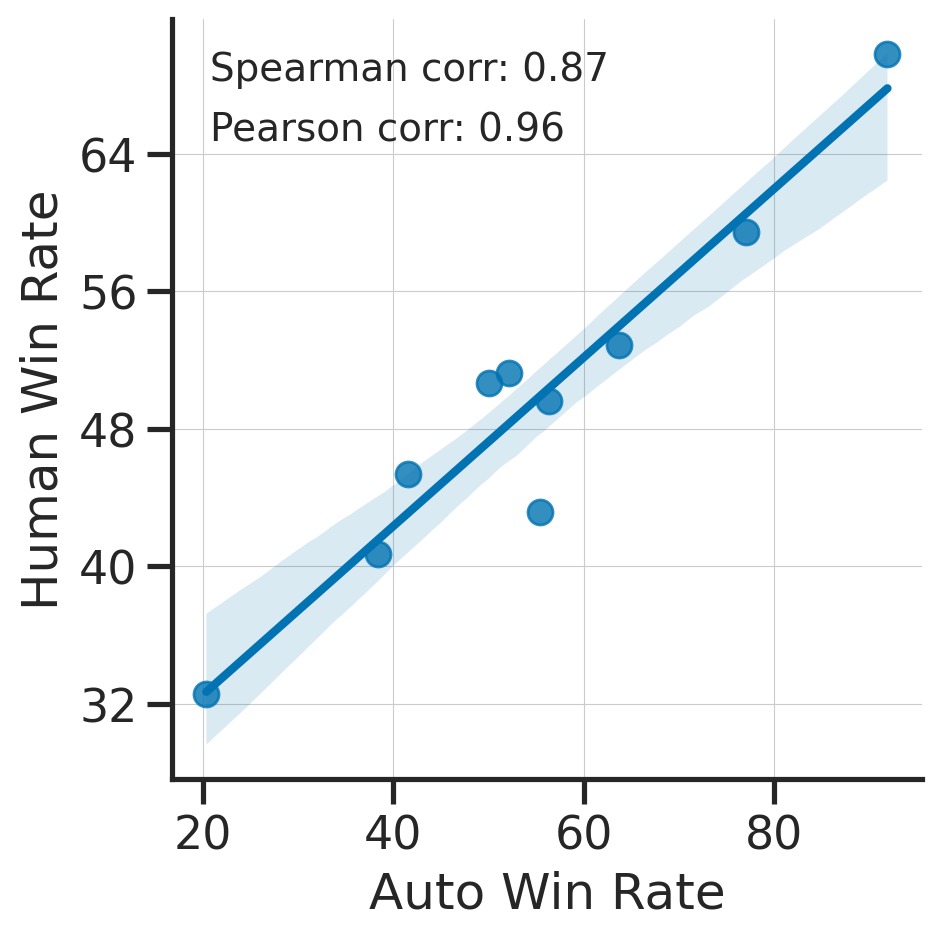

In [50]:
plotting.plot_winrate_correlations(human_leaderboard, auto_leaderboard,
                                  models_to_keep=models_keep)

In [54]:
models_keep = ['GPT-4',
 'GPT-4 300 characters',
 'ChatGPT',
 'AlpacaFarm PPO human (10k, step 80)',
 'AlpacaFarm best-of-16 human',
               "AlpacaFarm PPO sim (gpt4 greedy 20k, step 350)",
 'AlpacaFarm ExpIter human (n=16)',
 'AlpacaFarm PPO sim (step 40)',
 'Alpaca 7B',
 'Davinci001']

In [55]:
len(models_keep)

10

In [61]:
auto_leaderboard.loc[models_keep]

level_1,n_draws,n_total,n_wins,n_wins_base,standard_error,win_rate
generator,,,,,,
GPT-4,0.0,805.0,740.0,65.0,0.960835,91.925466
GPT-4 300 characters,0.0,805.0,620.0,185.0,1.483740,77.018634
ChatGPT,0.0,805.0,513.0,292.0,1.695611,63.726708
"AlpacaFarm PPO human (10k, step 80)",0.0,805.0,420.0,385.0,1.761697,52.173913
AlpacaFarm best-of-16 human,0.0,805.0,403.0,402.0,1.763363,50.062112
"AlpacaFarm PPO sim (gpt4 greedy 20k, step 350)",0.0,803.0,453.0,350.0,1.750977,56.413450
AlpacaFarm ExpIter human (n=16),0.0,803.0,334.0,469.0,1.740431,41.594022
AlpacaFarm PPO sim (step 40),0.0,805.0,446.0,359.0,1.753036,55.403727
Alpaca 7B,0.0,804.0,309.0,495.0,1.716596,38.432836


In [57]:
auto_leaderboard.loc[models_keep]

level_1,n_draws,n_total,n_wins,n_wins_base,standard_error,win_rate
generator,,,,,,
GPT-4,0.0,805.0,740.0,65.0,0.960835,91.925466
GPT-4 300 characters,0.0,805.0,620.0,185.0,1.483740,77.018634
ChatGPT,0.0,805.0,513.0,292.0,1.695611,63.726708
"AlpacaFarm PPO human (10k, step 80)",0.0,805.0,420.0,385.0,1.761697,52.173913
AlpacaFarm best-of-16 human,0.0,805.0,403.0,402.0,1.763363,50.062112
"AlpacaFarm PPO sim (gpt4 greedy 20k, step 350)",0.0,803.0,453.0,350.0,1.750977,56.413450
AlpacaFarm ExpIter human (n=16),0.0,803.0,334.0,469.0,1.740431,41.594022
AlpacaFarm PPO sim (step 40),0.0,805.0,446.0,359.0,1.753036,55.403727
Alpaca 7B,0.0,804.0,309.0,495.0,1.716596,38.432836


In [11]:
selected_models = [i for i in auto_leaderboard.index if "human" in i or "GPT" in i or "7B" in i]

In [14]:
auto_leaderboard.loc[selected_models, "win_rate"] - human_leaderboard.loc[selected_models, "win_rate"]

generator
GPT-4                                   22.111801
GPT-4 300 characters                    17.577640
ChatGPT                                 10.869565
AlpacaFarm PPO human (10k, step 40)     -0.310559
AlpacaFarm PPO human (10k, step 80)      0.931677
AlpacaFarm best-of-128 human             5.341615
AlpacaFarm best-of-16 human             -0.621118
AlpacaFarm ExpIter human (n=128)         2.606533
ChatGPT 300 characters                   0.186335
AlpacaFarm PPO human (10k, step 200)    -4.223602
AlpacaFarm best-of-4 human              -3.602484
AlpacaFarm ExpIter human (n=16)         -3.803988
AlpacaFarm ExpIter human (n=4)          -2.250085
Alpaca 7B                               -2.300995
AlpacaFarm FeedMe human                 -1.450805
LLaMA 7B                                -3.113325
Name: win_rate, dtype: float64

In [13]:
human_leaderboard.loc[selected_models, "win_rate"]

generator
GPT-4                                   69.813665
GPT-4 300 characters                    59.440994
ChatGPT                                 52.857143
AlpacaFarm PPO human (10k, step 40)     55.093168
AlpacaFarm PPO human (10k, step 80)     51.242236
AlpacaFarm best-of-128 human            46.211180
AlpacaFarm best-of-16 human             50.683230
AlpacaFarm ExpIter human (n=128)        45.652174
ChatGPT 300 characters                  47.888199
AlpacaFarm PPO human (10k, step 200)    50.931677
AlpacaFarm best-of-4 human              50.186335
AlpacaFarm ExpIter human (n=16)         45.398010
AlpacaFarm ExpIter human (n=4)          40.931677
Alpaca 7B                               40.733831
AlpacaFarm FeedMe human                 37.905237
LLaMA 7B                                 6.475716
Name: win_rate, dtype: float64